In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [94]:
df = pd.read_csv("gplay.csv",index_col=0)

In [95]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


In [4]:
#df = df.drop("Unnamed: 0",axis=1,inplace=True)

## Cleaning and Preprocessing

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10840
Data columns (total 9 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
dtypes: float64(1), object(8)
memory usage: 847.0+ KB


In [97]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [98]:
df["Rating"].fillna(df["Rating"].mean(),inplace=True)

In [99]:
df["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [100]:
df["Type"].fillna("Free",inplace=True)

In [101]:
df["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [102]:
df["Content Rating"].fillna("Everyone",inplace=True)

In [103]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10840
Data columns (total 9 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10841 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
dtypes: float64(1), object(8)
memory usage: 847.0+ KB


In [105]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [106]:
# Find non-numeric value
for data in df["Reviews"]:
    if not (str(data).isnumeric()):
        print(data)

3.0M


In [107]:
df[df["Reviews"] == "3.0M"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone


In [108]:
df.drop(10472,inplace=True)

In [109]:
df["Reviews"] = df["Reviews"].astype(int)

In [110]:
def clean_installs(x):
    x = str(x)
    x = x.replace(",","")
    x = x.replace("+","")
    return int(x)

In [111]:
df["Installs"] = df["Installs"].map(clean_installs)

In [112]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [113]:
def clean_price(x):
    x = str(x)
    x = x.replace("$","")
    return float(x)

In [114]:
df["Price"] = df["Price"].map(clean_price)

In [79]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [115]:
def clean_size(x):
    x = str(x)
    
    if x == "Varies with device":
        return np.nan
    elif x[-1] == "M":
        return float(x[:-1])
    else:
        x = float(x[:-1])
        return x/1000
        

In [116]:
clean_size("556k")

0.556

In [117]:
df["Size"] = df["Size"].map(clean_size)

In [118]:
df["Size"].fillna(df["Size"].mean(),inplace=True)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null float64
Installs          10840 non-null int64
Type              10840 non-null object
Price             10840 non-null float64
Content Rating    10840 non-null object
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 804.5+ KB


## Outlier

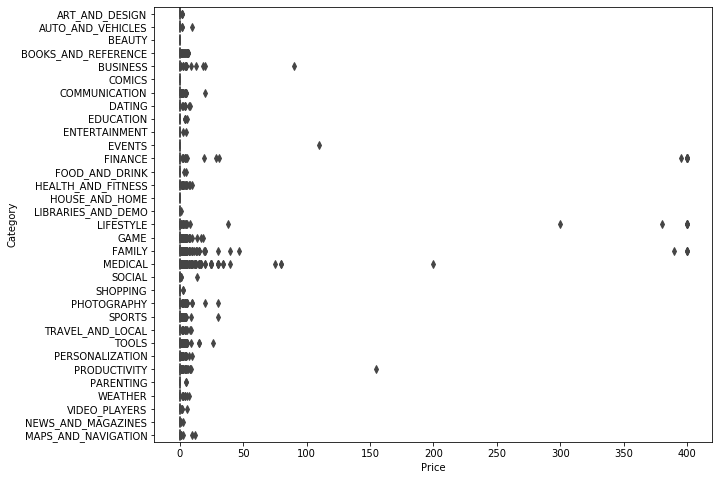

In [120]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Price",y="Category",data=df)
plt.show()

In [121]:
df[(df["Category"] == "FAMILY") & (df["Price"] > 25 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
4134,Norwegian For Kids & Babies F,FAMILY,4.193338,0,14.0,5,Paid,39.99,Everyone
4197,most expensive app (H),FAMILY,4.300000,6,1.5,100,Paid,399.99,Everyone
5354,I am Rich Plus,FAMILY,4.000000,856,8.7,10000,Paid,399.99,Everyone
5362,I Am Rich Pro,FAMILY,4.400000,201,2.7,5000,Paid,399.99,Everyone
5366,I Am Rich,FAMILY,3.600000,217,4.9,10000,Paid,389.99,Everyone
5489,AP Art History Flashcards,FAMILY,5.000000,1,96.0,10,Paid,29.99,Mature 17+
6559,Dr.Dice - Sic bo analyzer,FAMILY,4.193338,2,8.5,10,Paid,46.99,Everyone


In [122]:
df.drop([4134,4197,5354,5362,5366,5489,6559],inplace=True)

In [123]:
df[(df["Category"] == "LIFESTYLE") & (df["Price"] > 30 )]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
4362,💎 I'm rich,LIFESTYLE,3.800000,718,26.0,10000,Paid,399.99,Everyone
4367,I'm Rich - Trump Edition,LIFESTYLE,3.600000,275,7.3,10000,Paid,400.00,Everyone
5351,I am rich,LIFESTYLE,3.800000,3547,1.8,100000,Paid,399.99,Everyone
5355,I am rich VIP,LIFESTYLE,3.800000,411,2.6,10000,Paid,299.99,Everyone
5357,I am extremely Rich,LIFESTYLE,2.900000,41,2.9,1000,Paid,379.99,Everyone
5360,I am Rich Person,LIFESTYLE,4.200000,134,1.8,1000,Paid,37.99,Everyone
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.193338,0,40.0,0,Paid,399.99,Everyone


In [124]:
df.drop([4362,4367,5351,5355,5357,5360,9934],inplace=True)

In [125]:
df[(df["Category"] == "FINANCE") & (df["Price"] > 25)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
5356,I Am Rich Premium,FINANCE,4.100000,1867,4.700,50000,Paid,399.99,Everyone
5358,I am Rich!,FINANCE,3.800000,93,22.000,1000,Paid,399.99,Everyone
5359,I am rich(premium),FINANCE,3.500000,472,0.965,5000,Paid,399.99,Everyone
5364,I am rich (Most expensive app),FINANCE,4.100000,129,2.700,1000,Paid,399.99,Teen
5369,I am Rich,FINANCE,4.300000,180,3.800,5000,Paid,399.99,Everyone
5373,I AM RICH PRO PLUS,FINANCE,4.000000,36,41.000,1000,Paid,399.99,Everyone
9104,Dz kayas,FINANCE,4.193338,0,14.000,1,Paid,28.99,Everyone
9905,Eu sou Rico,FINANCE,4.193338,0,2.600,0,Paid,30.99,Everyone
9917,Eu Sou Rico,FINANCE,4.193338,0,1.400,0,Paid,394.99,Everyone


In [126]:
df.drop([5356,5358,5359,5364,5369,5373,9104,9905,9917],inplace=True)

In [127]:
df[(df["Category"] == "MEDICAL") & (df["Price"] > 25)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
2253,Vargo Anesthesia Mega App,MEDICAL,4.600000,92,32.0,1000,Paid,79.99,Everyone
2266,EMT PASS,MEDICAL,3.400000,51,2.4,1000,Paid,29.99,Everyone
2298,PTA Content Master,MEDICAL,4.200000,64,41.0,1000,Paid,29.99,Everyone
2301,A Manual of Acupuncture,MEDICAL,3.500000,214,68.0,1000,Paid,33.99,Everyone
2365,Vargo Anesthesia Mega App,MEDICAL,4.600000,92,32.0,1000,Paid,79.99,Everyone
2387,EMT PASS,MEDICAL,3.400000,51,2.4,1000,Paid,29.99,Everyone
2390,Language Therapy: Aphasia,MEDICAL,4.193338,10,28.0,1000,Paid,74.99,Everyone
2402,A Manual of Acupuncture,MEDICAL,3.500000,214,68.0,1000,Paid,33.99,Everyone
2406,PTA Content Master,MEDICAL,4.200000,64,41.0,1000,Paid,29.99,Everyone
2414,LTC AS Legal,MEDICAL,4.000000,6,1.3,100,Paid,39.99,Everyone


In [128]:
df.drop([2253,2266,2298,2301,2365,2387,2390,2402,2406,2414,9719],inplace=True)

In [129]:
df[(df["Category"] == "PRODUCTIVITY") & (df["Price"] > 140)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
6692,cronometra-br,PRODUCTIVITY,4.193338,0,5.4,0,Paid,154.99,Everyone


In [130]:
df.drop(6692,inplace=True)

In [131]:
df[(df["Category"] == "EVENTS") & (df["Price"] > 100)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
6624,BP Fitness Lead Scanner,EVENTS,4.193338,0,6.7,1,Paid,109.99,Everyone


In [132]:
df.drop(6624,inplace=True)

In [133]:
df[(df["Category"] == "BUSINESS") & (df["Price"] > 80)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9730,Lean EQ,BUSINESS,4.193338,6,10.0,10,Paid,89.99,Everyone


In [134]:
df.drop(9730,inplace=True)

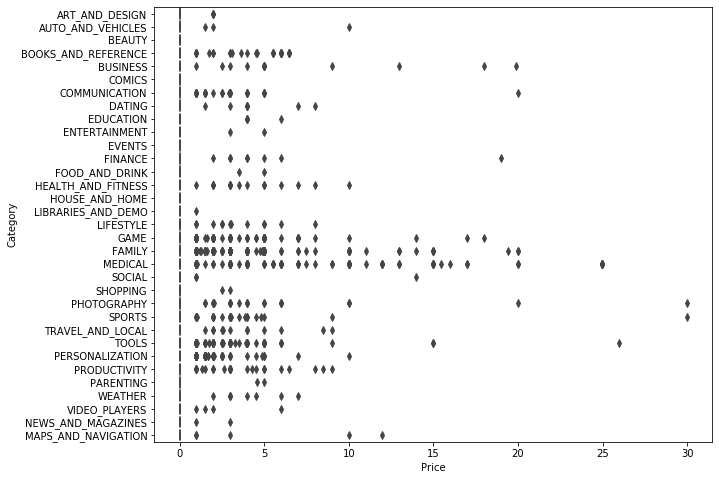

In [135]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Price",y="Category",data=df)
plt.show()

## Separate category and numeric data

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10803 entries, 0 to 10840
Data columns (total 9 columns):
App               10803 non-null object
Category          10803 non-null object
Rating            10803 non-null float64
Reviews           10803 non-null int32
Size              10803 non-null float64
Installs          10803 non-null int64
Type              10803 non-null object
Price             10803 non-null float64
Content Rating    10803 non-null object
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 1.1+ MB


In [137]:
df_cat = df.select_dtypes(object)

In [138]:
df_cat.head()

,App,Category,Type,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone


In [139]:
df_num = df.select_dtypes(["float64","int64","int32"])

In [140]:
df_num.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


## Category data label encoding

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

In [143]:
df_cat.head()

,App,Category,Type,Content Rating
0,6933,0,0,1
1,2629,0,0,1
2,8627,0,0,1
3,7798,0,0,4
4,6993,0,0,1


## Skewness

In [144]:
from scipy.stats import skew

In [145]:
df_num.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19.0,10000,0.0
1,3.9,967,14.0,500000,0.0
2,4.7,87510,8.7,5000000,0.0
3,4.5,215644,25.0,50000000,0.0
4,4.3,967,2.8,100000,0.0


Column:  Rating
Skewness:  -1.996011701490636


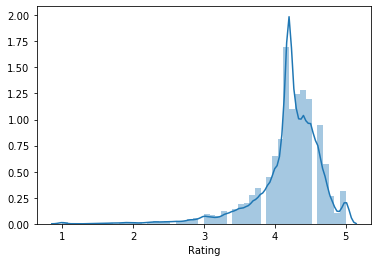

---------------------------------------------
Column:  Reviews
Skewness:  16.41961027454622


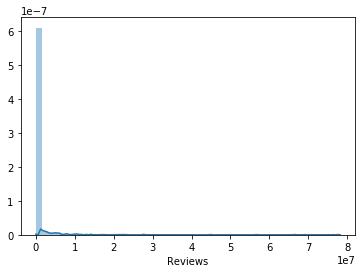

---------------------------------------------
Column:  Size
Skewness:  1.6955806095137171


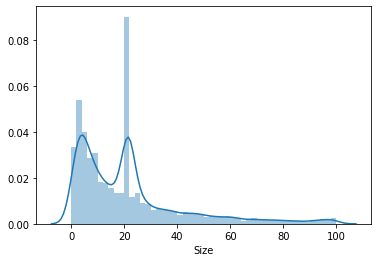

---------------------------------------------
Column:  Installs
Skewness:  9.554172556099614


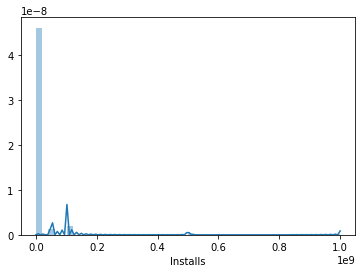

---------------------------------------------
Column:  Price
Skewness:  9.095544912817273


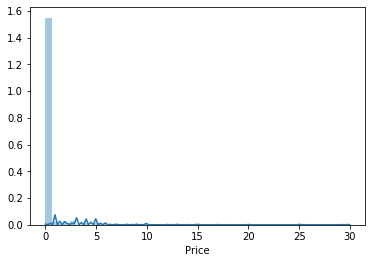

---------------------------------------------


In [146]:
for col in df_num:
    print("Column: ",col)
    print("Skewness: ",skew(df_num[col]))
    
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()
    print("---------------------------------------------")

In [147]:
df_num.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067859,0.074000,0.050988,0.026495
Reviews,0.067859,1.000000,0.128426,0.643089,-0.027657
Size,0.074000,0.128426,1.000000,0.082283,-0.011779
Installs,0.050988,0.643089,0.082283,1.000000,-0.034133
Price,0.026495,-0.027657,-0.011779,-0.034133,1.000000


In [148]:
# Reduce skewness
df_num["Reviews"] = np.sqrt(df_num["Reviews"])
df_num["Installs"] = np.sqrt(df_num["Installs"])

In [149]:
skew(df_num["Reviews"])

5.677937127587706

In [150]:
skew(df_num["Installs"])

4.992085328275491

In [151]:
## Join dataframe by concat

In [152]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [153]:
df_new.head()

,Rating,Reviews,Size,Installs,Price,App,Category,Type,Content Rating
0,4.1,12.609520,19.0,100.000000,0.0,6933,0,0,1
1,3.9,31.096624,14.0,707.106781,0.0,2629,0,0,1
2,4.7,295.820892,8.7,2236.067977,0.0,8627,0,0,1
3,4.5,464.374849,25.0,7071.067812,0.0,7798,0,0,4
4,4.3,31.096624,2.8,316.227766,0.0,6993,0,0,1


## Standard scaling

In [154]:
X = df_new.drop("Price",axis=1)
y = df_new["Price"]

In [155]:
X.head()

,Rating,Reviews,Size,Installs,App,Category,Type,Content Rating
0,4.1,12.609520,19.0,100.000000,6933,0,0,1
1,3.9,31.096624,14.0,707.106781,2629,0,0,1
2,4.7,295.820892,8.7,2236.067977,8627,0,0,1
3,4.5,464.374849,25.0,7071.067812,7798,0,0,4
4,4.3,31.096624,2.8,316.227766,6993,0,0,1


In [156]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
for col in X:
    ss = StandardScaler()
    X[col] = ss.fit_transform(X[[col]])

In [159]:
X.head()

,Rating,Reviews,Size,Installs,App,Category,Type,Content Rating
0,-0.193224,-0.405375,-0.121977,-0.433757,0.739214,-2.000562,-0.275674,-0.462892
1,-0.610724,-0.375276,-0.363061,-0.264003,-0.813741,-2.000562,-0.275674,-0.462892
2,1.059275,0.055730,-0.618610,0.163513,1.350437,-2.000562,-0.275674,-0.462892
3,0.641775,0.330158,0.167324,1.515436,1.051321,-2.000562,-0.275674,2.516034
4,0.224275,-0.375276,-0.903090,-0.373297,0.760863,-2.000562,-0.275674,-0.462892


## Feature engineering 

In [ ]:
# is any thing need to do here ?
# Rating and Content Rating are both similar.
# Type and Category can combine.
# Installs and App are both same.